**Q2) Fake News Detection**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/NNDL/HW4

Mounted at /content/drive
/content/drive/MyDrive/NNDL/HW4


# preprocessing

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.9.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv('FA-KES-Dataset.csv', encoding = 'latin1')
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [4]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [5]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [6]:
df.article_content = df.article_content.apply(lambda x: preprocess(x))
df.article_title = df.article_title.apply(lambda x: preprocess(x))

make new column  **'texts' = 'article_title' + 'article_content'**

In [9]:
df['texts']=df['article_title'] + df['article_title'].apply(lambda x: ' ') + df['article_content']

In [10]:
df['article_title'][0]

'syria attack symptoms consistent nerve agent use'

In [11]:
df['texts'][0]

'syria attack symptoms consistent nerve agent use wed 05 apr 2017 syria attack symptoms consistent nerve agent use victims suspected chemical attack syria appeared show symptoms consistent reaction nerve agent world health organization said wednesday cases appear show additional signs consistent exposure organophosphorus chemicals category chemicals includes nerve agents said statement putting death toll least 70 united states said deaths caused sarin nerve gas dropped syrian aircraft russia said believes poison gas leaked rebel chemical weapons depot struck syrian bombs sarin organophosporus compound nerve agent chlorine mustard gas also believed used past syria russian defence ministry spokesman say agent used attack said rebels used chemical weapons aleppo last year said likely kind chemical used attack sufferers apparent external injuries died rapid onset similar symptoms including acute respiratory distress said experts turkey giving guidance overwhelmed health workers idlib diagn

real news

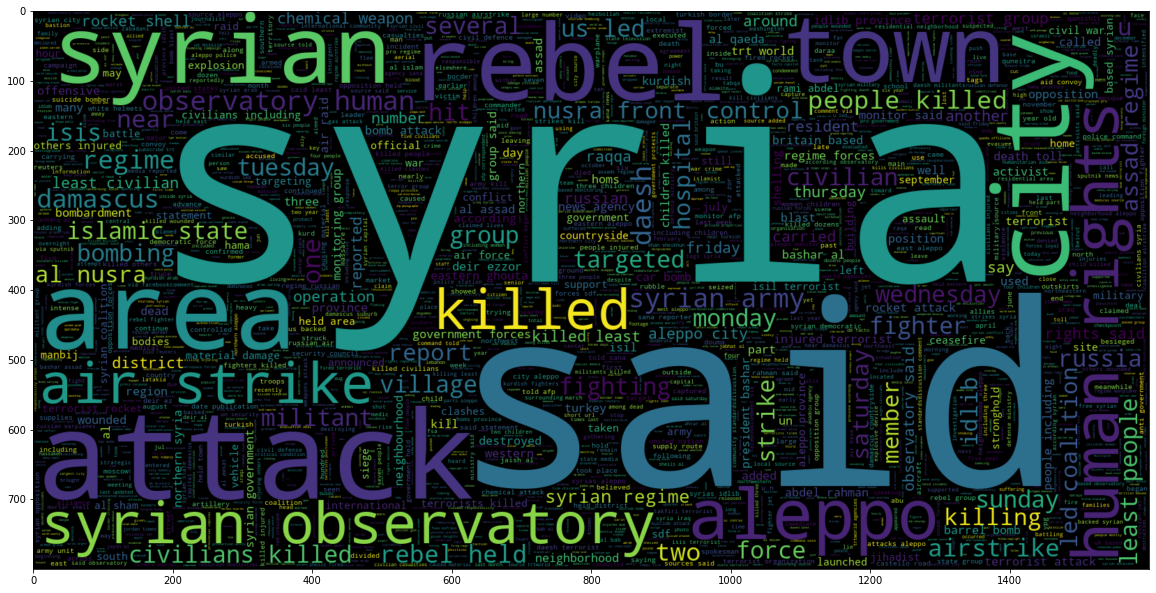

In [12]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.labels == 1].texts))
plt.imshow(wc , interpolation = 'bilinear')

fake news

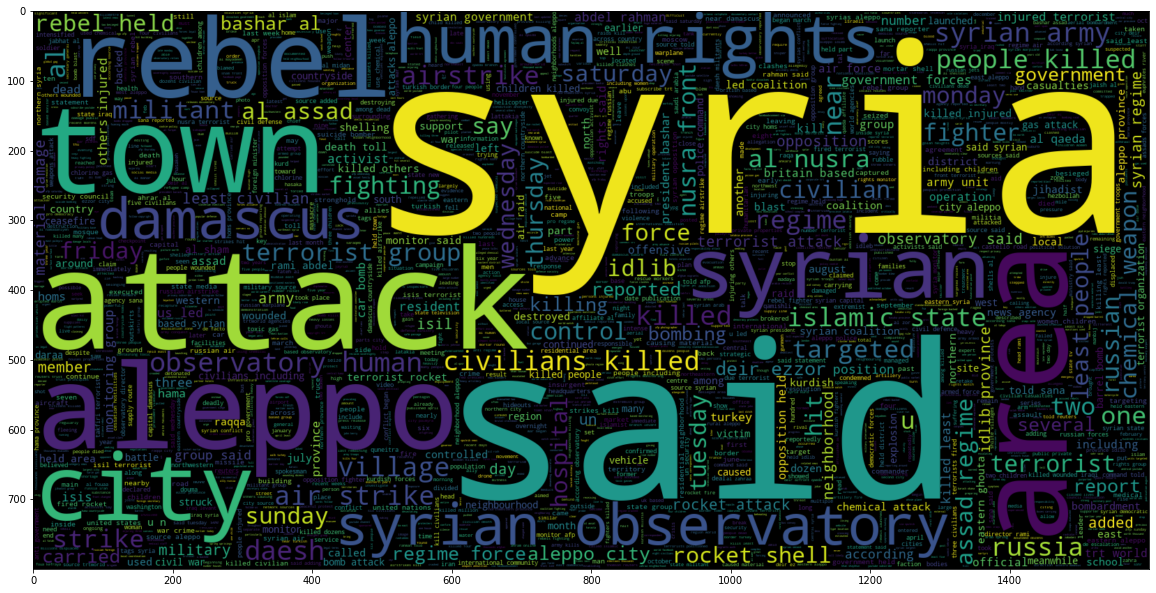

In [13]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.labels == 0].texts))
plt.imshow(wc , interpolation = 'bilinear')

Text(0.5, 1.0, 'Data Distribution')

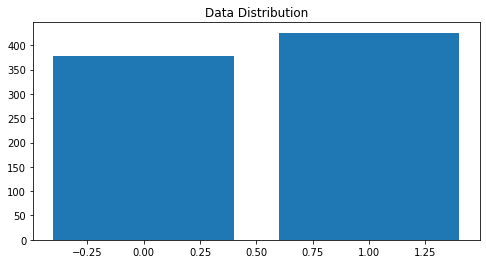

In [14]:
val_count = df.labels.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Data Distribution")

## train test split

In [15]:
# X_train,X_test, y_train, y_test = train_test_split(texts, target, test_size=0.2,
#                                          random_state=7) # Splits Dataset into Training and Testing set
# print("X_train size:", len(X_train))
# print("y_train size:", len(y_train))

# print("X_test size", len(X_test))
# print("y_test size", len(y_test))

In [16]:
train_data, test_data = train_test_split(df, test_size=0.2) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 643
Test Data size 161


In [17]:
train_data.head()

,unit_id,article_title,article_content,source,date,location,labels,texts
799,1965511221,turkish bombardment kills 20 civilians syria,28 08 2016 turkish bombardment kills 20 civili...,manar,8/28/2016,aleppo,1,turkish bombardment kills 20 civilians syria 2...
355,1924058145,us coalition airstrikes kill 20 civilians east...,published april 19 2017 war monitor said airst...,dailysabah,4/6/2017,deir ezzor,0,us coalition airstrikes kill 20 civilians east...
312,1924058073,national news agency damascus explosion due ro...,sat 24 aug 2013 2354 regional nna blast heard ...,nna,8/18/2013,damascus,0,national news agency damascus explosion due ro...
365,1924058161,least 10 die barrel bomb attacks syrian regime...,published october 10 2014 least 10 people incl...,dailysabah,10/14/2014,daraa,1,least 10 die barrel bomb attacks syrian regime...
286,1924058034,strike kills 15 near syrias daesh held raqqa m...,last updated apr 092017 least 15 civilians inc...,jordantimes,4/14/2017,raqqa,1,strike kills 15 near syrias daesh held raqqa m...


## tokenize

In [18]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.texts)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 9014


In [19]:
from keras.utils import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.texts),
                        maxlen = 100)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.texts),
                       maxlen = 100)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (643, 100)
Testing X Shape: (161, 100)


In [20]:
x_train[0]

array([2047,    3,  223,  178,  151,    1,   13,   41,   42,  875,  129,
         99,  752,  265, 5409,   45, 1380,  256,  494, 1442,    6, 1760,
         80,  600,  614,   93,  140,  206,  152,  100,   13,    3,  216,
         73,   49,  249,  495,   98,   21,  381, 2047,  154,   77,   12,
        438,  265,  187, 2786, 2046, 1000, 3954,  396,  347, 1001, 1125,
        385,  504,  249, 2047,  188,   39,   49,  130,   80,   12,   39,
          4, 3261,  184,   19,   23,   94,  753,  514,    3,   13,  152,
        100,   70,  409,  132,  267,   99,  164,  601,  265,  366,  154,
         12,  130, 1002,  247,   80,   39,   26,    2, 5410,   32,  249,
       2047], dtype=int32)

## Label Encoding

In [21]:
labels = train_data.labels.unique().tolist()
labels

[1, 0]

In [22]:
encoder = LabelEncoder()
encoder.fit(train_data.labels.to_list())

y_train = encoder.transform(train_data.labels.to_list())
y_test = encoder.transform(test_data.labels.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (643, 1)
y_test shape: (161, 1)


# word embedding

download glove- run for first time only!

In [23]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [24]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 15
MODEL_PATH = 'best_model.h5'

In [25]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [26]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [27]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          300,
                                          weights=[embedding_matrix],
                                          input_length=100,
                                          trainable=False)

# model training

## hybrid

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model

In [85]:
sequence_input = Input(shape=(100,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedding_sequences)
x = MaxPooling1D(2)(x)
x = LSTM(32, activation=None)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, outputs)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          2704200   
                                                                 
 conv1d_11 (Conv1D)          (None, 96, 128)           192128    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 48, 128)          0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 32)                20608     
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                          

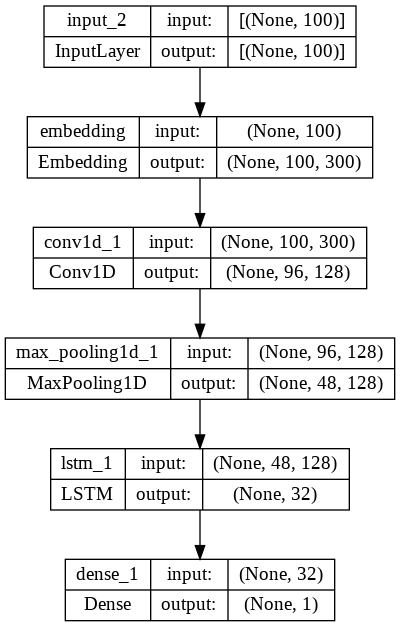

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [86]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=0.000001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [87]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
11/11 [==============================] - 4s 242ms/step - loss: 0.7056 - accuracy: 0.5303 - val_loss: 0.7186 - val_accuracy: 0.5155
Epoch 2/10
11/11 [==============================] - 2s 152ms/step - loss: 0.7043 - accuracy: 0.5288 - val_loss: 0.7175 - val_accuracy: 0.5155
Epoch 3/10
11/11 [==============================] - 2s 153ms/step - loss: 0.7036 - accuracy: 0.5241 - val_loss: 0.7166 - val_accuracy: 0.5155
Epoch 4/10
11/11 [==============================] - 2s 159ms/step - loss: 0.7028 - accuracy: 0.5241 - val_loss: 0.7157 - val_accuracy: 0.5155
Epoch 5/10
11/11 [==============================] - 2s 156ms/step - loss: 0.7020 - accuracy: 0.5257 - val_loss: 0.7151 - val_accuracy: 0.5217
Epoch 6/10
11/11 [==============================] - 2s 155ms/step - loss: 0.7016 - accuracy: 0.5257 - val_loss: 0.7149 - val_accuracy: 0.5155
Epoch 7/10
11/11 [==============================] - 2s 155ms/step - loss: 0.7012 - accuracy: 0.5257 - val_loss: 0.7144 - val_accuracy: 0.5217
Epoch 

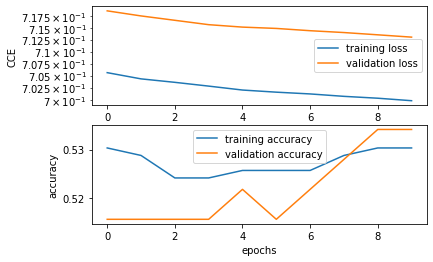

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline 

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()


test

In [91]:
def decode(score):
    return 1 if score>0.5 else 0
## 1:Real  0:Fake

scores = model.predict(x_test, verbose=1, batch_size=64)
y_pred_1d = [decode(score) for score in scores]

3/3 [==============================] - 0s 49ms/step


In [92]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(test_data.labels, y_pred_1d))

              precision    recall  f1-score   support

           0       0.69      0.11      0.19        80
           1       0.52      0.95      0.67        81

    accuracy                           0.53       161
   macro avg       0.61      0.53      0.43       161
weighted avg       0.61      0.53      0.43       161



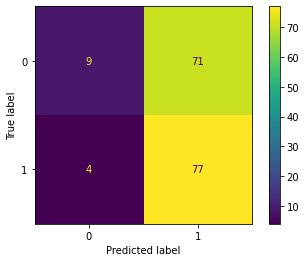

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_data.labels, y_pred_1d)

## rnn

In [94]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model

sequence_input = Input(shape=(100,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x = LSTM(32, activation=None)(embedding_sequences)

outputs = Dense(1, activation='sigmoid')(x)
model2 = Model(sequence_input, outputs)
model2.summary()




Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          2704200   
                                                                 
 lstm_12 (LSTM)              (None, 32)                42624     
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,746,857
Trainable params: 42,657
Non-trainable params: 2,704,200
_________________________________________________________________


In [95]:
model2.compile(optimizer=Adam(learning_rate=0.000001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [96]:
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
11/11 [==============================] - 3s 133ms/step - loss: 0.7108 - accuracy: 0.4588 - val_loss: 0.6957 - val_accuracy: 0.5031
Epoch 2/10
11/11 [==============================] - 1s 102ms/step - loss: 0.7107 - accuracy: 0.4588 - val_loss: 0.6957 - val_accuracy: 0.5031
Epoch 3/10
11/11 [==============================] - 1s 102ms/step - loss: 0.7107 - accuracy: 0.4572 - val_loss: 0.6957 - val_accuracy: 0.5031
Epoch 4/10
11/11 [==============================] - 1s 99ms/step - loss: 0.7106 - accuracy: 0.4557 - val_loss: 0.6957 - val_accuracy: 0.5031
Epoch 5/10
11/11 [==============================] - 1s 104ms/step - loss: 0.7105 - accuracy: 0.4572 - val_loss: 0.6957 - val_accuracy: 0.5031
Epoch 6/10
11/11 [==============================] - 1s 102ms/step - loss: 0.7104 - accuracy: 0.4572 - val_loss: 0.6957 - val_accuracy: 0.5031
Epoch 7/10
11/11 [==============================] - 1s 101ms/step - loss: 0.7103 - accuracy: 0.4557 - val_loss: 0.6957 - val_accuracy: 0.4969
Epoch 8

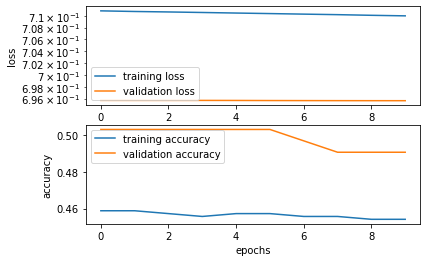

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline 

train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()


test

In [98]:
scores = model2.predict(x_test, verbose=1, batch_size=64)
y_pred_1d = [decode(score) for score in scores]

3/3 [==============================] - 0s 28ms/step


In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(test_data.labels, y_pred_1d))

              precision    recall  f1-score   support

           0       0.49      0.56      0.52        80
           1       0.49      0.42      0.45        81

    accuracy                           0.49       161
   macro avg       0.49      0.49      0.49       161
weighted avg       0.49      0.49      0.49       161



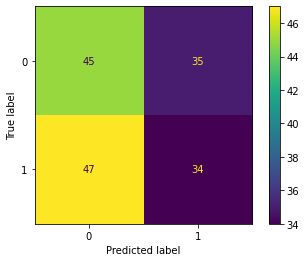

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_data.labels, y_pred_1d)